## Bootcamp Alura Modulo 2

Vamos analisar dados de Cobertura Vacinal por ano e Unidade de Federação. Dados foram obtidos através do link

A fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100. Ou seja, os dados de cobertura vacinal são todos percentuais



Fonte: http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def      
 http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf 


Vamos iniciar nossa exploração, ainda não sei onde vamos parar! :)


In [28]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dados = pd.read_csv(r'C:\Users\Samuel Natividade\Desktop\Python Files\Bootcamp Alura\A200106189_28_143_208.csv', sep = ';', skiprows = 3, encoding = 'ISO-8859-1', skipfooter = 20, thousands= ".", decimal = ",")
dados.head()
## skiprows - pula as linhas de cima
## skipfooter - pula as linhas de baixo

<ipython-input-30-8feb11e2d126>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv(r'C:\Users\Samuel Natividade\Desktop\Python Files\Bootcamp Alura\A200106189_28_143_208.csv', sep = ';', skiprows = 3, encoding = 'ISO-8859-1', skipfooter = 20, thousands= ".", decimal = ",")


,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,...,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,79.88
1,12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,...,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,69.26
2,13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,...,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.65
3,14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,...,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,75.68
4,15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,...,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,73.89


In [31]:
dados.tail()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
22,43 Rio Grande do Sul,NaN,65.25,58.90,65.07,63.25,85.90,71.91,75.60,74.07,...,81.99,72.95,73.47,84.15,87.69,53.86,72.54,74.94,51.65,70.96
23,50 Mato Grosso do Sul,NaN,NaN,39.02,70.62,75.01,92.05,85.08,88.66,80.84,...,89.37,83.46,81.81,110.11,113.07,63.55,78.81,83.52,52.21,79.69
24,51 Mato Grosso,31.76,37.67,37.44,74.22,78.08,84.87,84.34,85.97,81.93,...,87.40,81.37,75.04,92.61,100.32,58.32,74.28,76.70,46.38,76.12
25,52 Goiás,22.37,69.81,66.93,70.07,73.23,87.36,82.76,83.87,82.66,...,96.24,82.52,79.36,86.63,93.55,53.60,73.25,71.85,47.04,77.66
26,53 Distrito Federal,NaN,0.34,55.99,64.17,84.43,86.24,73.49,71.77,69.15,...,67.70,64.84,85.83,89.33,71.55,75.28,73.82,73.85,49.58,74.74


In [33]:
## Primeiro passo para iniciar conseguir análise algo dessa tabela, é primeiro limpar os dados
# 1 Vamos transformar esses dados em dados numéricos, para que possamos ver

dados = dados.fillna(0)

In [34]:
# pegando a mesma coluna que tinha pegado anteriormente, vemos que houve mudança
dados[dados['1994'] == 0]

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
5,16 Amapá,0.0,34.68,44.75,52.06,73.77,83.48,70.61,101.50,75.61,...,77.88,73.77,67.66,76.11,88.75,56.62,58.66,63.32,44.02,72.88
6,17 Tocantins,0.0,0.00,65.44,56.24,86.73,87.82,80.63,87.42,80.88,...,87.78,76.34,72.78,85.09,92.37,60.94,81.70,82.32,57.59,78.47
11,25 Paraíba,0.0,22.82,45.23,63.28,61.39,81.68,72.88,80.28,76.52,...,82.82,70.88,71.43,83.53,86.34,50.10,66.15,69.43,43.87,72.02
13,27 Alagoas,0.0,28.35,46.58,50.95,54.52,78.30,72.36,74.45,76.03,...,73.81,70.45,67.30,84.08,92.74,44.88,65.01,70.79,44.26,70.26
14,28 Sergipe,0.0,67.66,67.28,73.92,71.66,98.68,77.96,79.01,78.28,...,83.94,74.33,74.76,86.11,91.00,47.05,63.49,68.76,46.21,74.36
16,31 Minas Gerais,0.0,0.00,0.00,62.60,62.43,90.14,79.70,90.28,75.07,...,87.40,82.73,80.04,90.21,100.33,57.58,80.42,85.42,53.43,78.03
18,33 Rio de Janeiro,0.0,43.29,36.26,69.12,73.78,91.77,75.16,75.02,74.66,...,83.91,73.71,68.11,84.08,96.14,47.98,67.04,61.37,25.99,69.70
19,35 São Paulo,0.0,45.01,44.86,74.70,79.73,92.11,76.19,76.51,73.30,...,84.96,77.28,73.37,88.20,98.63,45.94,67.29,71.52,46.18,71.68
20,41 Paraná,0.0,35.30,51.84,76.53,63.40,75.09,78.72,81.01,77.26,...,89.97,79.48,77.59,86.95,96.41,55.32,77.66,81.79,58.11,75.08
22,43 Rio Grande do Sul,0.0,65.25,58.90,65.07,63.25,85.90,71.91,75.60,74.07,...,81.99,72.95,73.47,84.15,87.69,53.86,72.54,74.94,51.65,70.96


In [37]:
## vamos checar os tipos de dados
dados.dtypes

Unidade da Federação     object
1994                    float64
1995                    float64
1996                    float64
1997                    float64
1998                    float64
1999                    float64
2000                    float64
2001                    float64
2002                    float64
2003                    float64
2004                    float64
2005                    float64
2006                    float64
2007                    float64
2008                    float64
2009                    float64
2010                    float64
2011                    float64
2012                    float64
2013                    float64
2014                    float64
2015                    float64
2016                    float64
2017                    float64
2018                    float64
2019                    float64
Total                   float64
dtype: object

Todas são floats exceto pela Unidade de Federação, o que está correto :)

In [38]:
## vamos dropar a coluna total também
dados = dados.drop(columns = 'Total')
dados.head()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,...,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
1,12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,...,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
2,13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,...,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
3,14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,...,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
4,15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,...,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


In [41]:
# vamos utilizar o pd.melt para deixar em formar de dataframe
dados_abertos = pd.melt(dados, id_vars= 'Unidade da Federação')
dados_abertos.head()

,Unidade da Federação,variable,value
0,11 Rondônia,1994,42.76
1,12 Acre,1994,20.53
2,13 Amazonas,1994,20.15
3,14 Roraima,1994,64.06
4,15 Pará,1994,32.44


In [43]:
# mudando as colunas
novas_columns = ['unidade_da_federacao', 'ano', 'cobertura_vacinal']

dados_abertos.columns = novas_columns
dados_abertos.head()

,unidade_da_federacao,ano,cobertura_vacinal
0,11 Rondônia,1994,42.76
1,12 Acre,1994,20.53
2,13 Amazonas,1994,20.15
3,14 Roraima,1994,64.06
4,15 Pará,1994,32.44


In [50]:
## vamos criar uma nova coluna com dados da região, assim poderemos checar dados de cobertura vacinal por região
## criamos uma lista que recebe a região de acordo com a inicial de seu Estado
regiao = []
for estados in dados_abertos['unidade_da_federacao'].tolist():
    if estados[0] == '1': 
        regiao.append('Norte')
    elif estados[0] == '2':
        regiao.append('Nordeste')
    elif estados[0] == '3':
        regiao.append('Sudeste')
    elif estados[0] == '4':
        regiao.append('Sul')
    else:
         regiao.append('Centro-Oeste')
print(regiao)

['Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Sul', 'Sul', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Sul', 'Sul', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Sul', 'Sul', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 

In [51]:
dados_abertos['regiao'] = regiao
dados_abertos.head()

,unidade_da_federacao,ano,cobertura_vacinal,regiao
0,11 Rondônia,1994,42.76,Norte
1,12 Acre,1994,20.53,Norte
2,13 Amazonas,1994,20.15,Norte
3,14 Roraima,1994,64.06,Norte
4,15 Pará,1994,32.44,Norte


In [60]:
# criando unidade da federaçao apenas os valores do estado
estados_limpos = []
for estados in dados_abertos['unidade_da_federacao'].tolist():
    estados_limpos.append(estados[3:])

In [62]:
dados_abertos['unidade_da_federacao'] = estados_limpos
dados_abertos.head()

,unidade_da_federacao,ano,cobertura_vacinal,regiao
0,Rondônia,1994,42.76,Norte
1,Acre,1994,20.53,Norte
2,Amazonas,1994,20.15,Norte
3,Roraima,1994,64.06,Norte
4,Pará,1994,32.44,Norte


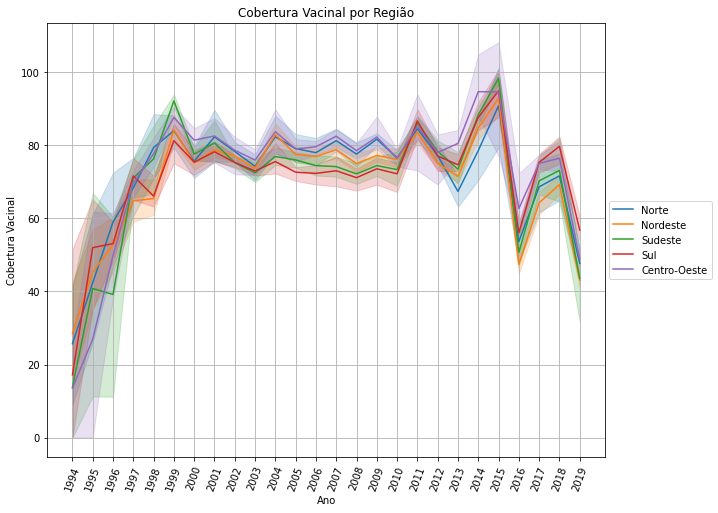

In [75]:
# vamos ver cobertura vacinal das Regiões do Brasil
plt.figure(figsize = (10,8))
ax = sns.lineplot(data = dados_abertos, x = 'ano', y = 'cobertura_vacinal', hue = 'regiao')
plt.title('Cobertura Vacinal por Região', fontsize = 12)
plt.grid(True)
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation = 70)
ax.set_ylabel('Cobertura Vacinal', fontsize = 10)
ax.set_xlabel('Ano', fontsize = 10)
plt.show()

A cobertura vacinal das regiões do Brasil são muito semelhantes, isso era esperado. Porém vemos que no ano de 2016 houve uma queda substancial da cobertura de vacina.


De acordo com essa notícia da Veja: https://veja.abril.com.br/saude/vacinacao-2016-teve-a-menor-cobertura-da-ultima-decada/ o baixo índice de cobertura vacinal se concentrou em crianças e adolescentes, onde relataram que 50% desse grupo estavam com vacinação 
desatualizada

A mesma notícia nos fala que durante o ano de 2017 o governo criou uma campanha para incentivar crianças e adolescentes a comparecerem aos postos de saúde para receber sua vacinação. Ao observar os dados, vimos que a cobertura de vacinação de 2016 para 2017 aumentou, pode ser que a política pública de vacinação pode ter sido eficaz, porém nos ano seguintes a variação positiva não foi a mesma de 2017 para 2018. E por fim no ano de 2019 houve uma queda brusca novamente na cobertura de vacinas.

Talvez a política de incentivo a vacinação não manteve a sua mesma pegada de antes.




Vou criar um dataframe somente com os estados do Norte, sou de Belém, e quero ver como está a Região Norte na cobertura Vacinal :)

Porém antes de filtrar a região norte, vamos checar a cobertura vacinal por UF do ultimo ano

In [86]:
## Vamos plotar a os dados de cobertura vacinal do último ano, no caso 2019, para deixar automatizado vamos utilizar o .max()
dados_abertos['ano'] = dados_abertos['ano'].astype(int)
ano_recente = dados_abertos['ano'].max()
dados_ultimo_ano = dados_abertos[dados_abertos['ano'] == ano_recente]
dados_ultimo_ano.head()

,unidade_da_federacao,ano,cobertura_vacinal,regiao
675,Rondônia,2019,51.44,Norte
676,Acre,2019,45.44,Norte
677,Amazonas,2019,49.97,Norte
678,Roraima,2019,48.04,Norte
679,Pará,2019,37.53,Norte


In [102]:
dados_ultimo_ano = dados_ultimo_ano.sort_values(by = 'cobertura_vacinal', ascending = False)

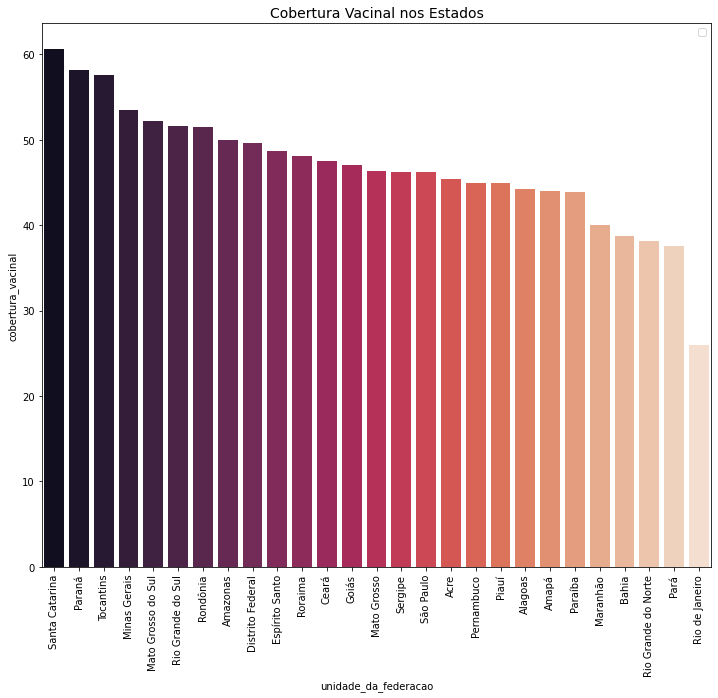

In [115]:
plt.figure(figsize = (12,10))
ax = sns.barplot(data = dados_ultimo_ano, x = 'unidade_da_federacao', y = 'cobertura_vacinal', palette = sns.color_palette('rocket',27))
plt.title('Cobertura Vacinal nos Estados', fontsize = 14)
plt.legend('')
plt.xticks(rotation = 90)
plt.show()

Nesse gráfico podemos ver que a cobertura vacinal de Santa Catarina, Paraná e Tocantins estão no top 3.

Surpreendentemente, o estado do Rio de Janeiro está em último lugar, e penúltimo infelizmente o meu estado o Pará 

In [80]:
# filtrando dados agora somente da região Norte
dados_norte = dados_abertos[dados_abertos['regiao'] == 'Norte']
dados_norte.head()

,unidade_da_federacao,ano,cobertura_vacinal,regiao
0,Rondônia,1994,42.76,Norte
1,Acre,1994,20.53,Norte
2,Amazonas,1994,20.15,Norte
3,Roraima,1994,64.06,Norte
4,Pará,1994,32.44,Norte


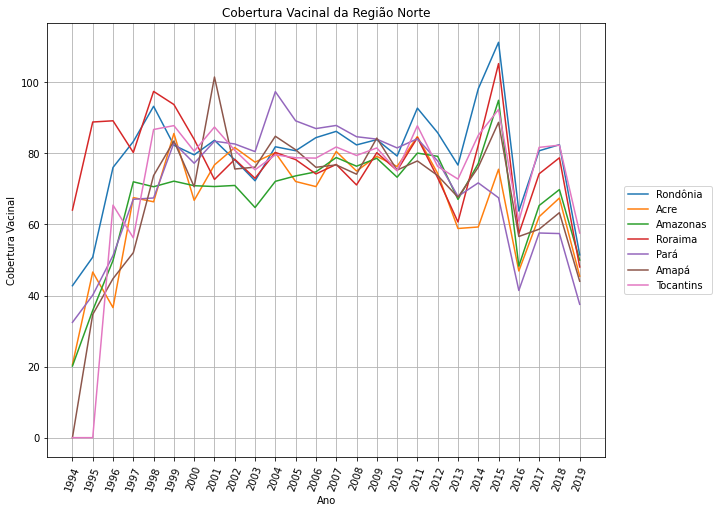

In [117]:
# vamos plotar a situação geral da região Norte
plt.figure(figsize = (10,8))
ax = sns.lineplot(data = dados_norte, x = 'ano', y = 'cobertura_vacinal', hue = 'unidade_da_federacao')
plt.title('Cobertura Vacinal da Região Norte', fontsize = 12)
plt.grid(True)
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation = 70)
ax.set_ylabel('Cobertura Vacinal', fontsize = 10)
ax.set_xlabel('Ano', fontsize = 10)
plt.show()

In [122]:
# filtrando dados amazonas e pará
dados_para_amazonas = dados_norte[(dados_norte['unidade_da_federacao'] == 'Pará') | (dados_norte['unidade_da_federacao'] == 'Amazonas')]

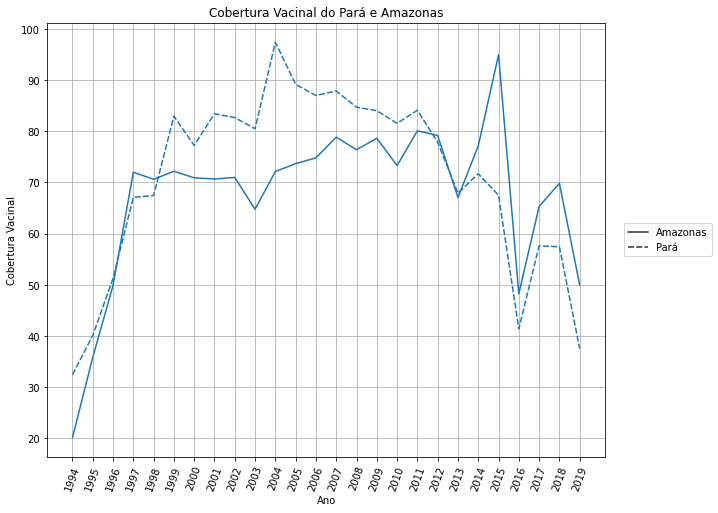

In [128]:
# vamos plotar a situação geral da região Norte
plt.figure(figsize = (10,8))
ax = sns.lineplot(data = dados_para_amazonas, x = 'ano', y = 'cobertura_vacinal', style ='unidade_da_federacao')
plt.title('Cobertura Vacinal do Pará e Amazonas', fontsize = 12)
plt.grid(True)
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation = 70)
ax.set_ylabel('Cobertura Vacinal', fontsize = 10)
ax.set_xlabel('Ano', fontsize = 10)
plt.show()